# Objective

Explore the number of times workers are clicking, using the persistence dataset

# Takeaways

The first plot suggests that workers are willing to click somewhere in the ballpark of 120 times on average.

In general, as number of spots increases:
 - number of clicks per worker increases
 - number of clicks per worker / number of spots in the image decreases
 
As shown in the second plot, when an image has 50 spots, workers annotate almost all spots on average. When an image has closer to 200 spots, workers annotate about 60% of all spots on average.

In [1]:
import os, sys, math
sys.path.insert(0, '../../../../FISH-annotation/fishanno')
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from QuantiusAnnotation import QuantiusAnnotation
import util
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

Want to plot these quantities

In [2]:
num_spots_list = np.arange(50, 250, 25)
num_clicks_list_list = []
avg_num_clicks_list = []
cwd = os.getcwd()

In [3]:
for num_spots in num_spots_list:
    json_filepath = cwd+ '/annotations/' + 'snr10_' + str(num_spots) + '.json'
    img_filename = 'snr_10_numspots_' + str(num_spots) + '_spot_img.png'
    qa = QuantiusAnnotation(json_filepath, img_filename)
    sa = SpotAnnotationAnalysis(qa)
    anno_all = qa.df()
    num_clicks_list = []
    for worker in util.get_workers(anno_all):
        worker_df = util.slice_by_worker(anno_all, worker)
        num_clicks_list.append(len(worker_df.index))
    avg_num_clicks_list.append(np.mean(num_clicks_list))
    num_clicks_list_list.append(num_clicks_list)

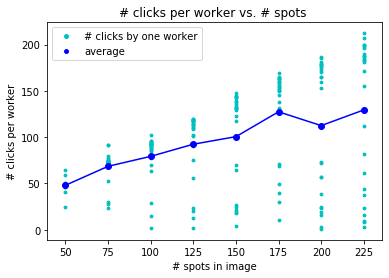

In [4]:
for num_spots, num_clicks_list in zip(num_spots_list, num_clicks_list_list):
    plt.scatter([num_spots]*len(num_clicks_list), num_clicks_list, s=8, color='c')
plt.plot(num_spots_list, avg_num_clicks_list, color='b')
plt.scatter(num_spots_list, avg_num_clicks_list, color='b')

plt.xlabel('# spots in image')
plt.ylabel('# clicks per worker')
handle1 = Line2D([0],[0], marker='o', color='w', markerfacecolor='c', label='# clicks by one worker')
handle2 = Line2D([0],[0], marker='o', color='w', markerfacecolor='b', label='average')
plt.legend(handles=[handle1, handle2], loc='upper left')
plt.title('# clicks per worker vs. # spots ')
plt.savefig("clicks_per_worker_vs_spots.pdf", transparent=True, bbox_inches="tight")
plt.show() 

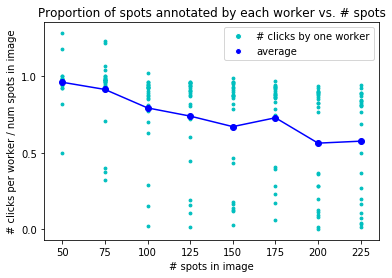

In [32]:
for num_spots, num_clicks_list in zip(num_spots_list, num_clicks_list_list):
    plt.scatter([num_spots]*len(num_clicks_list), [num_clicks/num_spots for num_clicks in num_clicks_list], s=8, color='c')
plt.plot(num_spots_list, [avg_num_clicks/num_spots for avg_num_clicks, num_spots in zip(avg_num_clicks_list, num_spots_list)], color='b')
plt.scatter(num_spots_list, [avg_num_clicks/num_spots for avg_num_clicks, num_spots in zip(avg_num_clicks_list, num_spots_list)], color='b')
plt.yticks([0, 0.5, 1])
plt.xlabel('# spots in image')
plt.ylabel('# clicks per worker / num spots in image')
handle1 = Line2D([0],[0], marker='o', color='w', markerfacecolor='c', label='# clicks by one worker')
handle2 = Line2D([0],[0], marker='o', color='w', markerfacecolor='b', label='average')
plt.legend(handles=[handle1, handle2], loc='upper right')
plt.title('Proportion of spots annotated by each worker vs. # spots')
plt.savefig("proportion_clicks_per_worker_vs_spots.pdf", transparent=True, bbox_inches="tight")
plt.show()    